In [611]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from tqdm import tqdm
from scipy import fft

In [10]:
pi = np.pi
exp = np.exp

Text(0, 0.5, 'signal, arb.units')

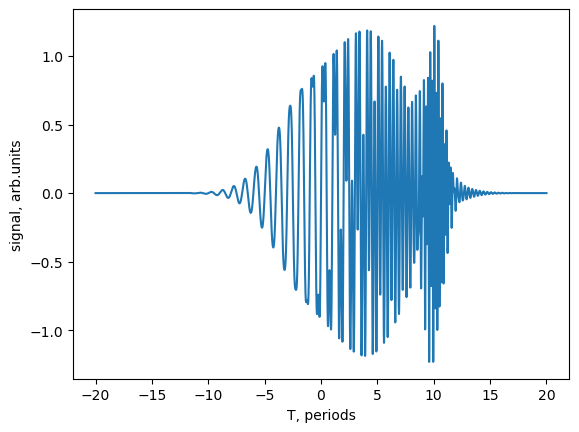

In [49]:
y = 0 
t=np.linspace(-20*2*pi, 20*2*pi, 3**9+6)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)

plt.plot(t/2/pi,y)

plt.xlabel('T, periods')
plt.ylabel('signal, arb.units')

In [576]:
def window_exp(width, pos, t, overlapping=0):
    width = width * (1 + 2 * overlapping)
    window = exp(-(t-pos)**2/2/width**2)
    return window

window_width=2.0*2*pi
window_position=-5.0*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

def get_stft(y,t,n_window_time,overlapping=0,max_frequency=6):
    len_fft = int(max_frequency/(2*(t[1] - t[0])))
    freq = fft.fftfreq(n=len(y), d=(t[1] - t[0]) / 2 / pi)[:len_fft]
    freq_intensity = np.zeros((n_window_time, len_fft))
    window_position = np.linspace(min(t), max(t), n_window_time)
    width = window_position[1] - window_position[0]
    
    for i, pos in enumerate(window_position):
        window_function = window_exp(width, pos, t , overlapping)
        y_window = y * window_function
        sp = fft.fft(y_window)
        freq_intensity[i] = (abs(sp) ** 2)[:len_fft]
 
    return freq_intensity.T, freq, window_position
        
        
        
        

In [577]:
x = y + np.sin(6 * t) * exp(- (t-7*2*pi)**2/2/8**2)

In [583]:
n_window_time = 120
freq_intensity_x, freq_x, T_x = get_stft(x, t, n_window_time=n_window_time, max_frequency=7)
freq_intensity_y, freq_y, T_y = get_stft(y, t, n_window_time=n_window_time, max_frequency=7)

Text(0.5, 0, 'T, periods')

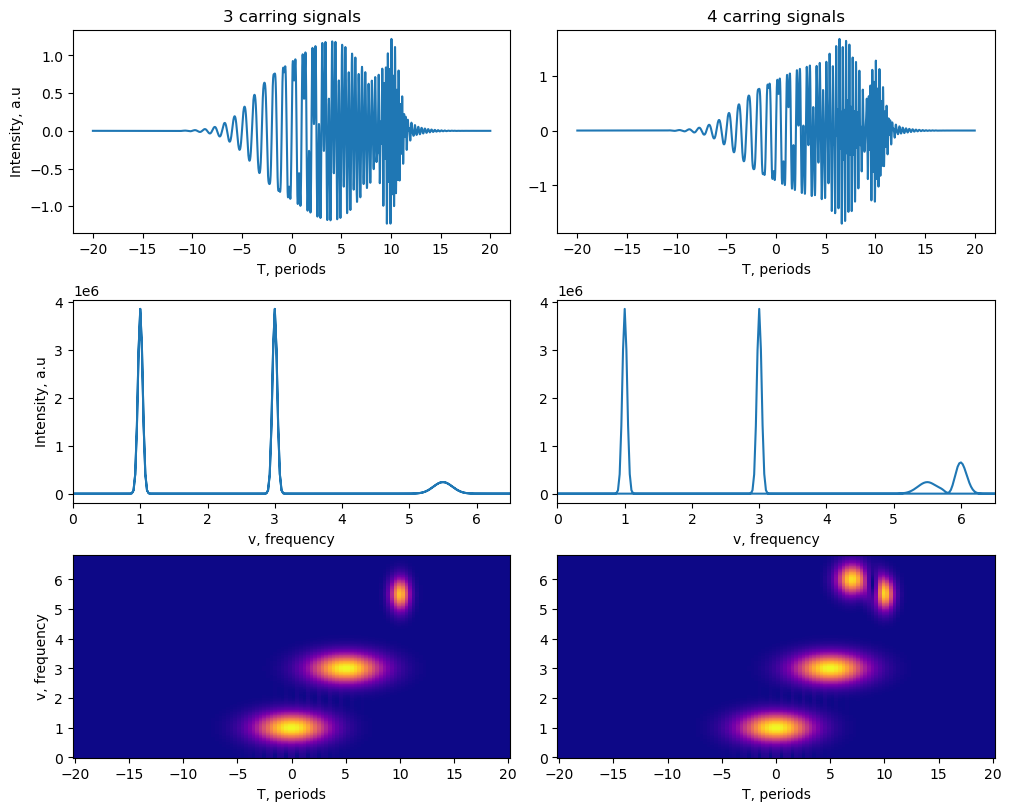

In [584]:
d = (t[1]-t[0])/2/pi
sp = fft.fft(y)
sp_2 = fft.fft(x)
w = fft.fftfreq(len(y), d=d)
w_2 = fft.fftfreq(len(x), d=d)

fig, axs = plt.subplots(3, 2, layout='constrained',figsize=(10, 8))

axs[0,0].set_title('3 carring signals')
axs[0,1].set_title('4 carring signals')

axs[0,0].plot(t/2/pi,y)
axs[0,1].plot(t/2/pi,x)
axs[0,0].set_xlabel('T, periods')
axs[0,1].set_xlabel('T, periods')
axs[0,0].set_ylabel('Intensity, a.u')




axs[1,0].plot(np.abs(w), abs(sp)**2)
axs[1,0].set_xlim(0,6.5)
axs[1,1].plot(w_2, abs(sp_2)**2)
axs[1,1].set_xlim(0,6.5)
axs[1,0].set_ylabel('Intensity, a.u')
axs[1,0].set_xlabel('v, frequency')
axs[1,1].set_xlabel('v, frequency')

axs[2,0].pcolormesh(T_y/2/pi, freq_y, freq_intensity_y, cmap='plasma')
axs[2,1].pcolormesh(T_x/2/pi, freq_x, freq_intensity_x, cmap='plasma')
axs[2,0].set_ylabel('v, frequency')
axs[2,0].set_xlabel('T, periods')
axs[2,1].set_xlabel('T, periods')

In [612]:
lim_1 = 2**9
lim_2 = 2**20
time_arr = np.linspace(lim_1, lim_2, 20)
result_time = np.zeros_like(time_arr)
i = 0
for t in tqdm(time_arr):
    t = int(t)
    start = time.time()
    t=np.linspace(-20*2*pi, 20*2*pi, t)
    y = 0 
    y=np.sin(t)*exp(-t**2/2/20**2)
    y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
    y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
    freq_intensity_y, freq_y, T_y = get_stft(y, t, n_window_time=n_window_time, max_frequency=7)
    stop = time.time()
    result_time[i] = stop - start
    i += 1
    


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [05:11<00:00, 15.59s/it]


Text(0, 0.5, 'Time, s')

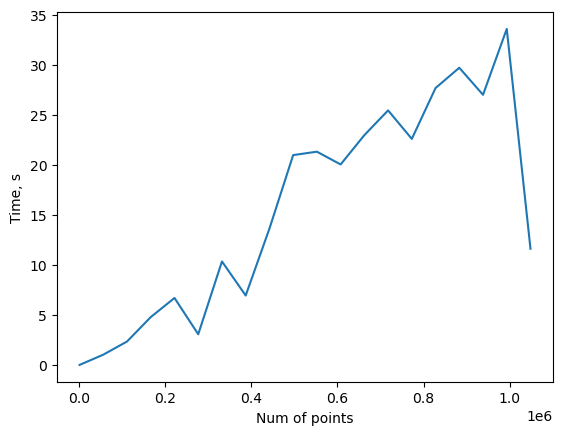

In [621]:
plt.plot(time_arr,result_time)
plt.xlabel('Num of points')
plt.ylabel('Time, s')